In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider
provider = SaverProvider()

In [3]:
from soft_info import get_counts, get_KDEs

# Code params
d = 3
T = 3
layout = [25, 19, 26, 22, 16] # Hardcoded for testing purposes, can be retrieved


job = provider.retrieve_job("cmyhbrqrmwhg008bs4h0")
memory = job.result().get_memory() 

kde_dict, scaler_dict = get_KDEs(provider, 'ibmq_mumbai', layout, bandwidths=0.2, plot=False)
counts_kde = get_counts(memory, kde_dict, scaler_dict, layout, T)
print(counts_kde)

Processing 1000 shots: 100%|██████████| 1000/1000 [00:55<00:00, 17.95it/s]

{'000000000': 870, '000010000': 14, '010101000': 11, '101010000': 10, '001000000': 9, '000100001': 8, '010001001': 7, '000001000': 7, '000101000': 6, '110011010': 5, '000000100': 5, '100010100': 4, '000010100': 4, '001000100': 4, '000001001': 4, '000000001': 3, '000100000': 3, '010001000': 2, '010100000': 2, '001010000': 2, '001011010': 1, '000000010': 1, '000011010': 1, '110010010': 1, '101010100': 1, '100110010': 1, '001001010': 1, '000101100': 1, '100000000': 1, '001100010': 1, '011101000': 1, '101011000': 1, '010100001': 1, '000110100': 1, '001010100': 1, '010000000': 1, '100010000': 1, '000001010': 1, '010111100': 1, '000101001': 1}


In [30]:
from qiskit_qec.circuits import RepetitionCodeCircuit, ArcCircuit
from qiskit_qec.decoders import UnionFindDecoder

decoder = UnionFindDecoder(RepetitionCodeCircuit(d, T))

print("code distance:", decoder.code.d)
print("nb of syndr rounds:", decoder.code.T)
print("\nlink bits:", decoder.code.link_bits)
print("code qubits:", decoder.code.code_qubit)

code distance: 3
nb of syndr rounds: 3

link bits: [ClassicalRegister(2, 'round_0_link_bit'), ClassicalRegister(2, 'round_1_link_bit'), ClassicalRegister(2, 'round_2_link_bit')]
code qubits: QuantumRegister(3, 'code_qubit')


# Soft reweight testing

In [37]:
from soft_info import soft_reweight

reweighted_graph = soft_reweight(decoder, memory, kde_dict, scaler_dict, layout)

src_node_idx: 0 tgt_node_idx: 1
kde_0: KernelDensity(bandwidth=0.2) kde_1: KernelDensity(bandwidth=0.2)


ValueError: Found array with dim 3. StandardScaler expected <= 2.

# Decoding graph testing

Nodes: <built-in method nodes of rustworkx.PyGraph object at 0x2a5a79040>


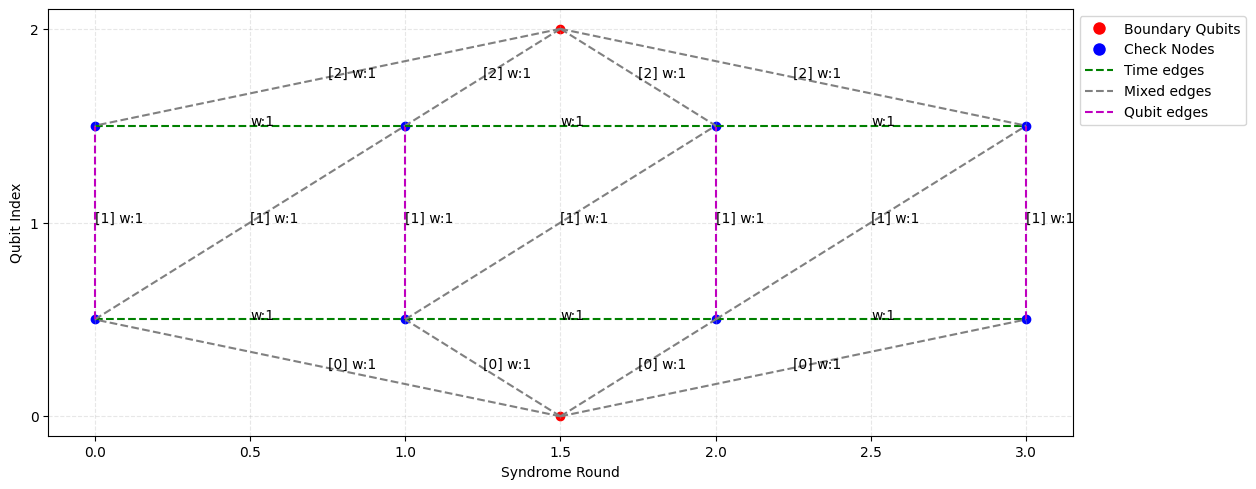

In [10]:
from soft_info import rx_draw_2D, soft_reweight

graph = decoder.decoding_graph.graph
rx_draw_2D(graph)

In [25]:
for idx, edge in enumerate(graph.edges()[:3]):
    print(f"Edge {idx}:", edge)
    print(edge.weight)
    print(edge.properties)

Edge 0: {'qubits': [], 'weight': 1, 'properties': {}}
1
{}
1
Edge 1: {'qubits': [0], 'weight': 1, 'properties': {}}
1
{}
1
Edge 2: {'qubits': [0], 'weight': 1, 'properties': {}}
1
{}
1


In [29]:
for idx, edge in enumerate(graph.edge_list()[:3]):
    print(f"Edge {idx}:", edge)

Edge 0: (0, 1)
Edge 1: (2, 1)
Edge 2: (2, 0)
